<a href="https://colab.research.google.com/github/JuliaKut/Neural-network/blob/main/Laba31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Підключаємо бібліотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Загрузка тестової та навчальної вибірки

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Нормалізація даних

In [3]:
x_train = x_train / 255
x_test = x_test / 255

Перетворення правильних відповідей для представлення по категоріях:

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Створення моделі мережі

In [5]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
None


Компіляція мережі, де оптимізація  – adam, міра помилки - categorical_crossentropy, метрика оптимізації accuracy.

In [7]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Навчання мережі

In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5747 - accuracy: 0.8304 - val_loss: 0.1891 - val_accuracy: 0.9447
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1717 - accuracy: 0.9488 - val_loss: 0.1306 - val_accuracy: 0.9611
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9640 - val_loss: 0.1174 - val_accuracy: 0.9644
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9738 - val_loss: 0.1321 - val_accuracy: 0.9604
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.1095 - val_accuracy: 0.9675


Подаю на вхід тестові зображення

In [9]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9695


[0.10713929682970047, 0.9695000052452087]

Перевірка мережі на конкретному зображенні

[[6.8109109e-08 9.9473095e-01 6.4373904e-05 3.1434131e-05 3.1725073e-04
  1.1563226e-08 7.8184947e-08 4.8480607e-03 5.8930650e-06 1.9514407e-06]]
 Це є цифра: 1


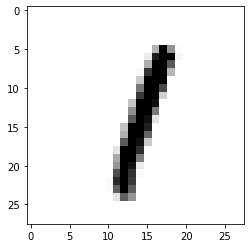

In [15]:
n = 5
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print(f" Це є цифра: {np.argmax(res)}" )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()